# __Unsupervised Learning__

## __Agenda__

- Dimensionality Reduction Techniques:
  - Importance of Dimensionality Reduction
  - Principal Component Analysis (PCA)
  - Linear Discriminant Analysis (LDA)
  - t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Association Rule Learning
  - Introduction to Association Rule Learning
  - Apriori Algorithm
  - Eclat Algorithm
- Anomaly Detection Techniques
  - Isolation forest
- Model Evaluation in Unsupervised Learning:
  - Silhouette Score for Clustering
  

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np

In [ ]:
df = load_breast_cancer(as_frame=True)
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
dim_red = PCA(n_components=0.98)
X_train_reduced = dim_red.fit_transform(X_train_scaled)
X_test_reduced = dim_red.transform(X_test_scaled)

In [ ]:
dim_red.explained_variance_ratio_

array([0.43502782, 0.19500007, 0.09781519, 0.06486409, 0.05253378,
       0.041128  , 0.0223559 , 0.01647952, 0.01380052, 0.01205262,
       0.01056565, 0.00883488, 0.00772384, 0.00531689])

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_reduced, y_train)
y_pred = dt.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.956140350877193

In [ ]:
dt_2 = DecisionTreeClassifier(max_depth=5)
dt_2.fit(X_train, y_train)
y_pred_2 = dt_2.predict(X_test)
accuracy_score(y_test, y_pred_2)

0.9298245614035088

In [ ]:
pca_viz = PCA(n_components=2)
X_train_pca_viz = pca_viz.fit_transform(X_train_scaled)
X_test_pcaviz = pca_viz.transform(X_test_scaled)

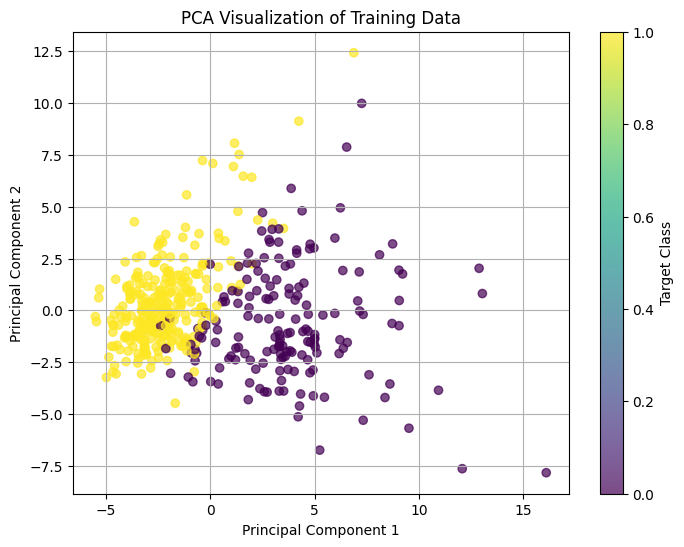

In [ ]:
# prompt: X_train_pca_viz

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_viz[:, 0], X_train_pca_viz[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Training Data')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.show()

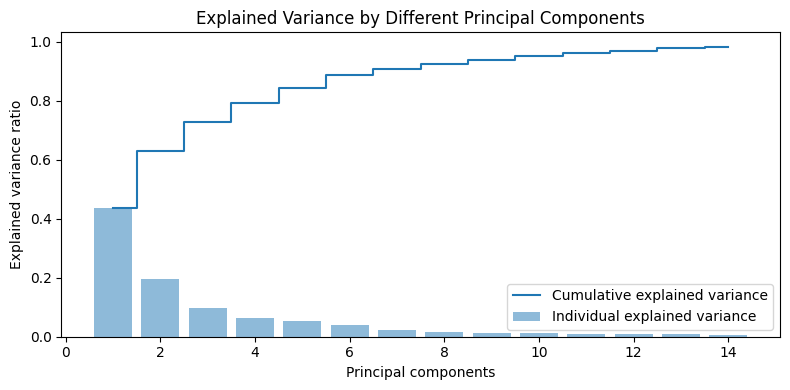

In [ ]:
explained_variance = dim_red.explained_variance_ratio_


plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## __6.3 Dimensionality Reduction Techniques__

Dimensionality reduction involves decreasing the number of features (or dimensions) in a dataset while preserving as much information as possible. This technique is used for various purposes, such as simplifying a model, enhancing the performance of a learning algorithm, or making the data easier to visualize.

### __6.3.1 Importance of Dimensionality Reduction__

Dimensionality reduction is important because it:

1. **Improves computational efficiency:** Reduces the computational cost for data processing and model training.
2. **Mitigates the curse of dimensionality:** Simplifies data to prevent overfitting and sparsity issues.
3. **Reduces noise in data:** Eliminates irrelevant or noisy features to enhance model performance.
4. **Enhances data visualization:** Makes high-dimensional data easier to visualize in 2D or 3D.
5. **Boosts model performance:** Focuses on the most relevant features for better accuracy.
6. **Saves storage and memory:** Decreases the amount of storage and memory needed for large datasets.
7. **Increases model interpretability:** Simplifies models, making them easier to understand and explain.
8. **Avoids multicollinearity:** Addresses high correlation between features to improve regression models.

### __6.3.2 Approaches of Dimensionality Reduction__

There are two ways to apply the dimension reduction technique, which are given below:

#### __A. Feature Selection__

Feature selection is the process of choosing a subset of relevant features and discarding irrelevant ones from a dataset to build a more accurate model. Essentially, it involves selecting the most optimal features from the input data.

Three methods are used for the feature selection:

- **Filter Methods:** this method involves filtering the dataset to retain only the relevant features.

  Common techniques include: Correlation, Chi-Square Test, and ANOVA (these techniques are already covered in ADSP course).

- **Wrapper Methods:** this method evaluates subsets of features using a machine learning model. Features are added or removed based on their impact on model performance. It is more accurate but also more complex than filter methods.

  Common techniques include: Forward Selection and Backward Selection.

- **Embedded Methods:** these methods evaluate the importance of features during the training process of the machine learning model.

  Common techniques include: LASSO, Elastic Net, and Ridge Regression (these techniques are covered in detail in regression lesson).

#### __B. Feature Extraction__

Feature extraction is the process of transforming high-dimensional data into a lower-dimensional space. This approach is useful for retaining essential information while using fewer resources for processing.

Some common feature extraction techniques are:

- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Independent Component Analysis (ICA)

Let's focus more on each of the Feature Extraction techniques mentioned above.

### __6.3.3 Principal Component Analysis (PCA)__

Principal Component Analysis (PCA) is a statistical technique for dimensionality reduction in data analysis. It simplifies the complexity of high-dimensional data while preserving trends and patterns.

Real-world problems typically deal with datasets that have a huge number of features.


Example: High-resolution images that need classification or power allocation exercises across multiple communication channels that have high dimensionality. Dealing with such datasets demands increased computational power and more complex algorithms.

Principal Component Analysis (PCA) is an unsupervised learning technique used to preprocess datasets and reduce their dimensionality while preserving the original dataset.

#### __Common Terms in PCA__

- Dimensionality: It is the number of features present in the data.

- Correlation: It indicates the strength of the relationship between features. The correlation value ranges between -1 and +1. It is -1 when variables are inversely proportional and +1 when they are directly proportional.

- Orthogonality: Dimensionality reduction techniques often utilize orthogonality to maintain the independence of features when reducing the number of dimensions in a dataset.

- Covariance Matrix: It is a matrix containing the covariance between variables.

  *Variance* is a measure of the variability or spread of a single variable, indicating how much the values differ from the mean.

- Eigenvector: Given a square matrix $A$ and a nonzero vector $v$, and $v$ is the eigenvector if $Av$ (the result of applying matrix $A$ to $v$) is a scalar multiple of $v$, i.e. $Av$ = ${\lambda}v$ where ${\lambda}$ is the eigenvalue

- Eigenvalues: The scalar ${\lambda}$ associated with the eigenvector $v$
in the transformation $Av$ = ${\lambda}v$, indicating how much the eigenvector is scaled during the transformation. It represents the variance captured by each principal component, indicating their importance in explaining the data's variability.

- Principal component: Principal components are new variables created as linear combinations of the original variables, arranged to be uncorrelated and to compress most of the information into the initial components. In this way, from 10-dimensional data, PCA aims to maximize the information in the first component, then the next most in the second, and so on.












#### __Steps involved in PCA__

1. Standardization
2. Covariance matrix computation
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a Feature vector
5. Recasting data along the principal component axes



#### __Standardization__


Standardization adjusts the range of variables so that each one contributes equally, ensuring uniformity in their influence.

Standardization transforms data by rescaling it to have a mean of 0 and a standard deviation of 1, ensuring consistent ranges and making it more suitable for comparison and analysis across different variables.

$$ Z = \frac{\text{Value} - \text{mean}}{\text{Standard deviation}} $$

This normalization process mitigates the dominance of variables with larger ranges over those with smaller values.


#### __Covariance Matrix Computation__


It helps to check the correlation between features in a dataset.

**Types of covariance:**

- Positive covariance indicates a direct correlation.

- Negative covariance indicates an inverse correlation.



The covariance matrix provides a summary of the relationships (correlations) between variables in a tabular representation.

\begin{pmatrix}
\text{Cov}(x, x) & \text{Cov}(x, y) \\
\text{Cov}(y, x) & \text{Cov}(y, y)
\end{pmatrix}



#### __Identifying Principal Components__

Eigenvectors and eigenvalues, computed from the covariance matrix, determine the principal components of data. Each eigenvector, paired with a corresponding eigenvalue, represents an axis direction where the data variance is maximized—these are the principal components. The eigenvalues indicate the amount of variance each component carries. By ordering the eigenvectors from highest to lowest eigenvalues, you rank the principal components by their significance.











![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/identifying_principal_components.png)

#### __Create a Feature Vector__

In this step, we decide whether to retain all components or to discard the less significant ones (those with lower eigenvalues). We then form a matrix from the remaining, more significant eigenvectors, known as the Feature Vector






![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/feature_vector.png)

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

#### __Recasting Data Along Principal Component Axes__


In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis).

$$ \text{FinalDataSet} = \text{FeatureVector}^T \times \text{OriginalDataSet}^T $$

This is done by multiplying the transpose of the feature vector by the transpose of the original dataset.


#### __Applications of PCA__

PCA compresses information into a smaller set with new dimensions.


- In neuroscience, it identifies the action potential of neurons by their shape.
- In quantitative finance, it reduces the complexity of stock analysis.


Let's implement PCA.

**Load the diabetes dataset**

This dataset consists of 2000 samples with 8 features: preg, plas, pres, skin, insu, mass, pedi, and age. Each sample includes a target variable class, which indicates whether the sample tested positive or negative for a condition.



**Note:** We will be using the same dataset to apply both Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) to compare the effectiveness of these two techniques.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,159.1,67.5,27.0,408.6,57.0,0.642,36.0,tested_negative
1,14.0,170.3,111.6,30.0,758.4,65.6,1.157,53.0,tested_positive
2,10.0,139.3,88.5,83.5,831.3,46.2,1.204,23.0,tested_positive
3,7.0,150.6,24.8,49.6,337.6,29.0,1.391,43.0,tested_positive
4,6.0,102.2,116.4,51.8,351.5,60.4,1.993,31.0,tested_positive


In [ ]:
# Split the dataset into features and target
X = data.drop(columns=['class'])
y = data['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

Split the dataset
- The dataset is split into training (60%) and testing (40%) sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply the PCA


- Import PCA from sklearn.decomposition.
- Find the optimal number of principal components
- Instantiate a PCA object with the optimal number of components.
- Fit PCA to the scaled data.
- Transform the scaled data using PCA.


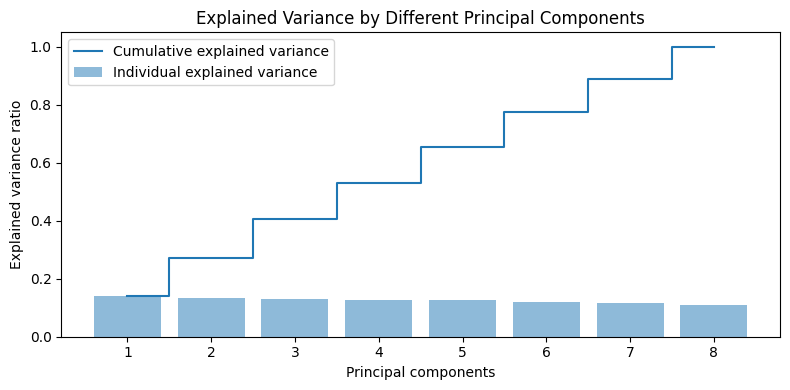

In [ ]:
# Apply PCA without reducing dimensionality to find the optimal number of components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


**Observation:**

The plot shows that each of the 8 principal components explains a similar amount of variance individually, while the cumulative explained variance steadily increases, approaching 100% by the 8th component.

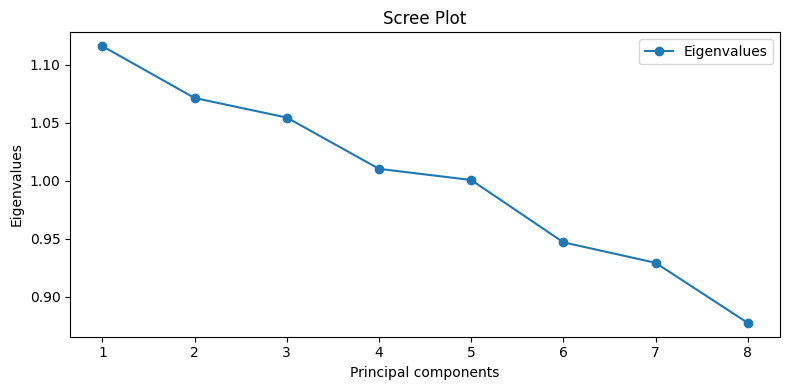

In [ ]:
# Eigenvalues (which are proportional to the explained variance)
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', label='Eigenvalues')
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


**Observation:**


The scree plot shows the eigenvalues, representing the explained variance ratio, for each of the eight principal components. The eigenvalues decrease sharply from the 1st to the 2nd principal component, continue to decline at a slower rate up to the 3rd component, and then begin to level off from the 4th component onwards. This pattern indicates that the first few components capture most of the variance in the data, with diminishing returns for each additional component beyond the 3rd or 4th. Thus, the plot suggests that the optimal number of principal components is around 3 or 4.

In [ ]:
import pandas as pd
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Create DataFrames

In [ ]:
df_train_pca = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_train_pca['Target'] = y_train

df_test_pca = pd.DataFrame(data=X_test_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_test_pca['Target'] = y_test

Visualize the results for training and testing set.

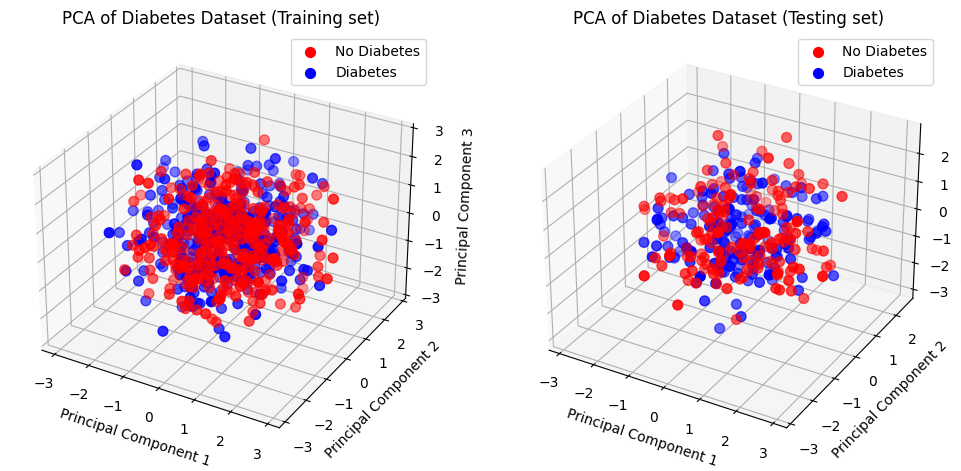

In [ ]:
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(12, 8))

# Training set
ax1 = fig.add_subplot(121, projection='3d')
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_pca['Target'] == target
    ax1.scatter(df_train_pca.loc[indices, 'Principal Component 1'],
                df_train_pca.loc[indices, 'Principal Component 2'],
                df_train_pca.loc[indices, 'Principal Component 3'],
                c=color, s=50)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.legend(['No Diabetes', 'Diabetes'])
ax1.set_title('PCA of Diabetes Dataset (Training set)')
ax1.grid()

# Testing set
ax2 = fig.add_subplot(122, projection='3d')
for target, color in zip([0, 1], colors):
    indices = df_test_pca['Target'] == target
    ax2.scatter(df_test_pca.loc[indices, 'Principal Component 1'],
                df_test_pca.loc[indices, 'Principal Component 2'],
                df_test_pca.loc[indices, 'Principal Component 3'],
                c=color, s=50)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.legend(['No Diabetes', 'Diabetes'])
ax2.set_title('PCA of Diabetes Dataset (Testing set)')
ax2.grid()

plt.show()

**Observation**

PCA is effective in reducing the dimensionality of the diabetes dataset.

Next Steps: For further analysis, other dimensionality reduction techniques like LDA could be explored, or a more complex classification model could be trained to improve the separation of the two classes.

### __6.3.4 Linear Discriminant Analysis (LDA)__

Linear discriminant analysis (LDA) is a technique used for dimensionality reduction and classification. It aims to project the data onto a lower-dimensional space in such a way that the separation between different classes is maximized. LDA focuses on finding a linear combination of features that best separate two or more classes of objects or events.

- LDA assumes the data follows a Gaussian distribution.
- It assumes that the covariance matrices of different classes are equal.
- It assumes the data is linearly separable, allowing for an accurate linear decision boundary to classify different classes.
- It can reduce the dimensionality of the data to a maximum of $𝑘 − 1$ components, where $k$ is the number of classes in the target variable.

Let's implement LDA.

We will use the same train-test split set that was used in PCA.


- Import LDA from sklearn.decomposition.
- Instantiate a LDA object with one components.
- Fit LDA to the scaled data.
- Transform the scaled data using LDA.


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


Create DataFrames

In [ ]:
df_train_lda = pd.DataFrame(data=X_train_lda, columns=['LDA Component 1'])
df_train_lda['Target'] = y_train

df_test_lda = pd.DataFrame(data=X_test_lda, columns=['LDA Component 1'])
df_test_lda['Target'] = y_test


Visualize the results for training and testing set.

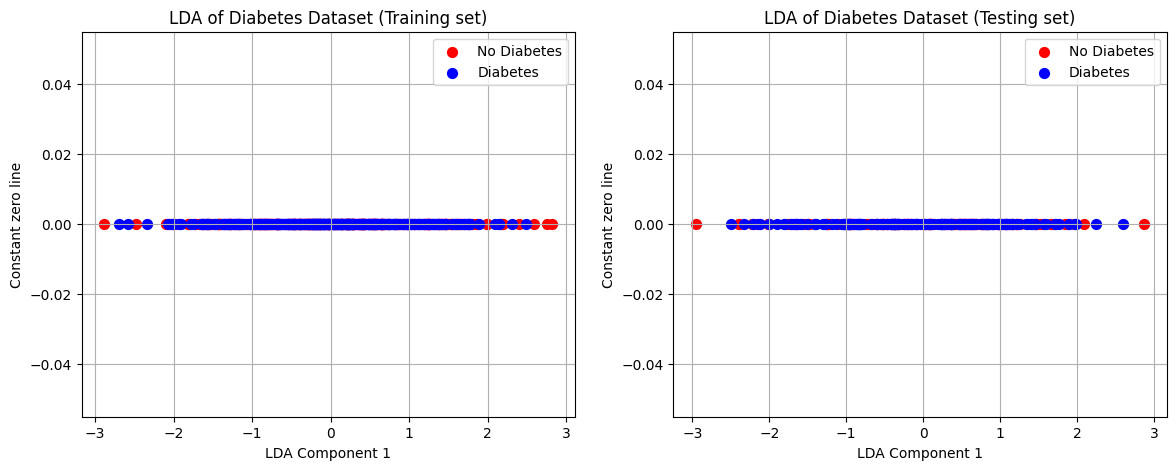

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

# Training set
plt.subplot(1, 2, 1)
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_lda['Target'] == target
    plt.scatter(df_train_lda.loc[indices, 'LDA Component 1'], np.zeros_like(df_train_lda.loc[indices, 'LDA Component 1']),
                c=color, s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Training set)')
plt.grid()

# Testing set
plt.subplot(1, 2, 2)
for target, color in zip([0, 1], colors):
    indices = df_test_lda['Target'] == target
    plt.scatter(df_test_lda.loc[indices, 'LDA Component 1'], np.zeros_like(df_test_lda.loc[indices, 'LDA Component 1']),
                c=color, s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Testing set)')
plt.grid()

plt.show()


**Observation**

In both plots, the LDA component is plotted along the x-axis. The points are colored according to their target labels: red for non diabetes and blue for diabetes. The zero y-values are used to clearly separate the data points for visualization purposes.

### __6.3.5 t-Distributed Stochastic Neighbor Embedding (t-SNE)__

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction algorithm that uses a randomized approach to non-linearly reduce the dimensionality of a dataset. It focuses on retaining the local structure of the data in the lower-dimensional space.



This algorithm helps explore high-dimensional data by mapping it into lower dimensions while preserving local relationships. As a result, we can visualize and understand the structure of the dataset by plotting it in 2D or 3D.

Let's implement t-SNE.

**Loading the Dataset**

- The MNIST dataset is loaded. It contains 60,000 training images and 10,000 test images of handwritten digits (0-9).
- Here we are taking `y` as `label` to plot the visualization, it is not used to train the model.

In [24]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
X = df.iloc[:, 1:].values  # Pixel values
y = df.iloc[:, 0].values  # Labels

In [25]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Preprocessing**

- The images are reshaped from 28x28 pixels to 784-dimensional vectors.
- The pixel values are normalized to be between 0 and 1.


**Applying t-SNE**

- `TSNE` from `sklearn.manifold` is used to reduce the data to 2 dimensions for visualization.
- Only a subset of 1000 samples is used for performance reasons (t-SNE can be computationally intensive).

**Note:** Dataset without train test split is taken to fit the model since this is only for visualization purpose.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


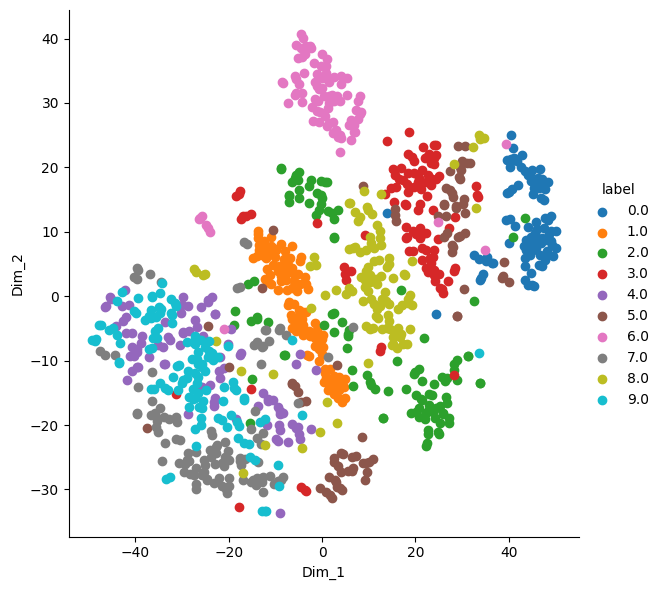

In [28]:
import seaborn as sns
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=42, n_iter=1000)

tsne_data = model.fit_transform(X[:1000])

# Creating a new DataFrame to help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, y[:1000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

**Observation**

- t-SNE has successfully reduced the high-dimensional MNIST data to two dimensions while preserving the local structure, as evidenced by the formation of distinct clusters for different digits.
- The clusters correspond to the digit labels, making it easier to visualize and understand the data distribution.

## __6.4 Association Rule Learning__

### __6.4.1 Introduction to Association Rule Learning__

Association Rule Learning is a popular unsupervised learning technique used to uncover relationships, patterns, or associations among a set of items in large datasets. This technique is commonly used in market basket analysis, where the goal is to identify sets of products that frequently co-occur in transactions.

The two key concepts in association rule learning are **frequent itemsets** and **association rules**.

**Frequent Itemsets:**

- These are groups of items that appear frequently together in transactions.
- The frequency is measured by the support count, which is the number of transactions containing the itemset.

**Association Rules:**

These are implications of the form $ { 𝐴, 𝐵} → { 𝐶 } $, meaning that if items A and B are bought, then item C is likely to be bought.

Rules are evaluated based on their support, confidence, and lift:
- Support: The proportion of transactions that contain the itemset or how frequently an item appears in the dataset.
$$ \text{Supp}(X) = \frac{\text{Freq}(X)}{T}$$

- Confidence: The probability that a transaction containing the antecedent also contains the consequent or how often the rule has been found to be true.
$$ \text{Confidence} = \frac{\text{Freq}(X, Y)}{\text{Freq}(X)}$$

- Lift: The ratio of the observed support to that expected if the items were independent. A lift greater than 1 indicates a positive association.
$$ \text{Lift} = \frac{\text{Supp}(X, Y)}{\text{Supp}(X) \times \text{Supp}(Y)}$$

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/association.png)

#### __Practical Applications:__
1. **Market Basket Analysis:** Identifying products that are frequently bought together to optimize product placement and promotions.
2. **Web Usage Mining:** Analyzing user navigation patterns to improve website design and content recommendation.
3. **Bioinformatics:** Discovering relationships between genes and proteins.
4. **Fraud Detection:** Identifying patterns in fraudulent transactions.

#### __Popular Algorithms:__

**Apriori Algorithm:**
- It uses breadth-first search and Hash Tree to calculate the itemset efficiently.
- Generates frequent itemsets by iteratively expanding smaller itemsets.
- Uses the _Apriori Property_ which states that all non-empty subsets of a frequent itemset must also be frequent.

**Eclat Algorithm:**

- Uses a depth-first search strategy to find frequent itemsets.
- It is more efficient for dense datasets.

Let's understand these algorithms one-by-one.

### __6.4.2 Apriori Algorithm__

The Apriori algorithm is a classic algorithm used for mining frequent itemsets and learning association rules over transactional databases. It is an unsupervised learning technique, typically used in market basket analysis to find interesting relationships between items in large datasets.

The algorithm operates by identifying the frequent individual items in the database and extending them to larger itemsets as long as those itemsets appear sufficiently often in the database.

Let's implement Apriori Algorithm

**Data Loading and Preparation:**

- The dataset was loaded into a pandas DataFrame from a CSV file named `Market_Basket_Optimisation.csv`.
- Each transaction (row) in the dataset represents a set of items purchased together.
- We converted this DataFrame into a list of lists, where each inner list contains the items of a single transaction.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Convert the DataFrame to a list of lists
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])


**Transaction Encoding:**

- We used the `TransactionEncoder` from the `mlxtend.preprocessing` module to convert the list of lists into a one-hot encoded DataFrame. In this format, each column represents an item, and each row represents a transaction, with binary values indicating whether an item was purchased in that transaction.

In [ ]:
# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

**Display the first 5 rows of the dataset.**

In [ ]:
# Display the first few rows of the one-hot encoded DataFrame
print(df.head())

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

**Applying the Apriori Algorithm:**

- The `apriori` function from the `mlxtend.frequent_patterns` module was used to find frequent itemsets. We specified a minimum support threshold of 0.01 (1%), meaning that an itemset must appear in at least 1% of transactions to be considered frequent.
- The result is a DataFrame where each row represents a frequent itemset, and the columns provide the support (proportion of transactions containing the itemset) and the itemsets themselves.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm with a minimum support of 0.01 (1%)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)



In [ ]:
frequent_itemsets.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


**Generating Association Rules:**

- The `association_rules` function was used to generate association rules from the frequent itemsets. We specified a minimum confidence threshold of 0.2 (20%), meaning that the rules must have a confidence of at least 20% to be considered.
- The result is a DataFrame where each row represents an association rule, and the columns provide various metrics related to the rule.

In [ ]:
# Generate the association rules with a minimum confidence of 0.2 (20%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())

Frequent Itemsets:
    support          itemsets
0  0.020397         (almonds)
1  0.033329         (avocado)
2  0.010799  (barbecue sauce)
3  0.014265       (black tea)
4  0.011465      (body spray)

Association Rules:
  antecedents      consequents  antecedent support  consequent support  \
0   (avocado)  (mineral water)            0.033329            0.238368   
1   (burgers)           (eggs)            0.087188            0.179709   
2   (burgers)   (french fries)            0.087188            0.170911   
3   (burgers)      (green tea)            0.087188            0.132116   
4   (burgers)           (milk)            0.087188            0.129583   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011598    0.348000  1.459926  0.003654    1.168147       0.325896  
1  0.028796    0.330275  1.837830  0.013128    1.224818       0.499424  
2  0.021997    0.252294  1.476173  0.007096    1.108844       0.353384  
3  0.017464    0.200306  1.516139  0.005945 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Observations**
- **support:** This column shows the proportion of transactions that contain the itemset. For example, 0.020397 means that almonds appear in approximately 2.04% of transactions.
- **itemsets:** This column lists the items in the frequent itemset. For example, (almonds) means that the itemset contains only almonds.

- **antecedents:** Items on the left-hand side of the rule (e.g., `avocado`).
- **consequents:** Items on the right-hand side of the rule (e.g., `mineral water`).
- **antecedent support:** Proportion of transactions that contain the antecedent itemset.
- **consequent support:** Proportion of transactions that contain the consequent itemset.


- **support:** Proportion of transactions that contain both the antecedent and consequent itemsets.
- **confidence:** Proportion of transactions containing the antecedent that also contain the consequent (calculated as `support / antecedent support`).
- **lift:** Ratio of the observed support to that expected if the antecedent and consequent were independent (calculated as `confidence / consequent support`).
- **leverage:** Difference between the observed support and the support expected if the antecedent and consequent were independent.
- **conviction:** Measure of the implication strength of the rule (calculated as `(1 - consequent support) / (1 - confidence)`).
- **zhangs_metric:** A measure of the strength of the association rule, balancing confidence and lift.

### __6.4.3 Eclat Algorithm__

The ECLAT algorithm, which stands for Equivalence Class Clustering and bottom-up Lattice Traversal, is a widely-used method for Association Rule mining. It is considered more efficient and scalable than the Apriori algorithm.


While Apriori operates in a horizontal fashion similar to Breadth-First Search in a graph, ECLAT functions vertically, akin to **Depth-First Search**. This vertical approach makes ECLAT faster than Apriori.

Let's implement Eclat Algorithm

In [ ]:
!pip install pyECLAT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from pyECLAT import ECLAT
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Load the Dataset:**


In [ ]:
# Load the dataset
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Preprocessing:**

- The dataset is converted into a list of transactions, where each transaction is a list of items.

In [ ]:
# Convert the DataFrame to a list of lists
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Creating DataFrames for Train and Test Sets:**

- We create DataFrames from the list of lists for both training and testing sets, which will be used as input for the pyECLAT library.

In [ ]:
# Split the transactions into training and testing sets
train_transactions, test_transactions = train_test_split(transactions, test_size=0.2, random_state=42)

# Create DataFrames from the list of lists for training and testing sets
train_df = pd.DataFrame(train_transactions)
test_df = pd.DataFrame(test_transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Performing ECLAT Algorithm:**

- We create an instance of ECLAT with the training DataFrame.
- We call the fit method with a minimum support threshold to get the frequent itemsets from the training set.
- The fit method returns two values: support_dict (a dictionary of itemsets with their support values) and frequent_itemsets (a list of frequent itemsets).
- We then convert these results into a pandas DataFrame for better readability.

In [ ]:
# Perform ECLAT algorithm using pyECLAT on the training set
eclat_instance = ECLAT(data=train_df, verbose=True)

# Get the frequent itemsets with a minimum support of 0.01 (1%) on the training set
support_dict, frequent_itemsets = eclat_instance.fit(min_support=0.01, min_combination=1, max_combination=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 121/121 [00:00<00:00, 2140.50it/s]


Combination 1 by 1


76it [00:01, 73.61it/s]


Combination 2 by 2


2850it [00:24, 115.87it/s]


In [ ]:
# Convert frequent itemsets to a DataFrame for better readability
total_transactions = len(transactions)

frequent_itemsets_df = pd.DataFrame({
    'Itemset': list(frequent_itemsets.keys()),
    'Support': [len(support_dict[item]) / total_transactions for item in frequent_itemsets.keys()]
})

# Sort the DataFrame by 'Support' in descending order
frequent_itemsets_df_sorted = frequent_itemsets_df.sort_values(by='Support', ascending=False)

frequent_itemsets_df_sorted.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Itemset,Support
24,mineral water,0.193574
12,eggs,0.142781
73,spaghetti,0.139315
11,french fries,0.135715
47,chocolate,0.130516
...,...,...
70,almonds,0.016798
77,cooking oil & mineral water,0.016798
69,meatballs,0.016798
174,turkey & mineral water,0.016531


**Observation:**

**Mineral Water (0.193574):** The highest support value in this snippet, indicating that mineral water appears in about 19.36% of all transactions. This suggests it's a very popular item among customers.

**Eggs (0.142781):** Also showing high popularity, eggs are included in approximately 14.28% of transactions.

**Spaghetti (0.139315), French Fries (0.135715), and Chocolate (0.130516):** These items are also commonly purchased, each appearing in about 13-14% of transactions, reflecting their strong customer demand.

**Cooking Oil & Mineral Water (0.016798), Meatballs (0.016798), Almonds (0.016798):** These itemsets show a much lower support, appearing in about 1.68% of transactions. The combination of cooking oil and mineral water might indicate a specific usage pattern or a niche but relevant market segment.

## __6.5 Anomaly Detection Techniques__

Anomaly detection is a technique used to identify rare items, events, or outliers that differ significantly from the majority of the data. In unsupervised learning, anomaly detection is particularly challenging because there are no labeled examples of anomalies to guide the learning process.

### __6.5.1 Isolation forest__

Isolation Forest is an unsupervised learning algorithm for anomaly detection that works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The key idea is that anomalies are few and different, so they are more susceptible to isolation.

- **Unique Approach:** Isolation Forest does not rely on proximity measures like traditional methods.
- **Random Feature Selection:** It randomly selects features and splits them at random values.
- **Isolation Process:** This process creates partitions or "trees" to isolate individual data points.
- **Anomaly Detection:** Anomalies, being fewer and further from the norm, typically require fewer splits to isolate.
- **Efficiency:** This makes anomalies easier and faster to detect compared to normal observations.

Let's implement the Isolation Forest to detect anamolies.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the dataset
file_path = 'credit_card_fraud.csv'  # Update the path to your file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

         V1        V2        V3        V4        V5      Amount  Class
0  0.543360 -0.193659  0.968185 -0.213457  0.285803   55.271583    0.0
1  0.982691  0.808058  0.885231  1.352203  1.272570   39.268121    0.0
2 -1.840874 -0.223466  1.954157 -1.435910 -0.992866  275.345272    0.0
3 -0.573662  0.579633  1.809306  0.596441 -0.453636  405.983871    0.0
4 -1.124642  0.536653 -0.929511  1.190549 -0.546042  108.890401    0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Features for training
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Fit the Isolation Forest Model:**

- IsolationForest is fit on the X_train data.


- Predictions and anomaly scores for `X_train` and `X_test` are stored in separate variables (`train_anomaly_predictions`, `train_anomaly_scores`, `test_anomaly_predictions`, `test_anomaly_scores`).

In [ ]:
print("Training features:", X_train.columns)
print("Testing features:", X_test.columns)

Training features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Amount'], dtype='object')
Testing features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Amount'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)


# Predict anomalies (-1 for anomalies, 1 for normal points) on the training set
train_anomaly_predictions = iso_forest.predict(X_train)
train_anomaly_scores = iso_forest.decision_function(X_train)

# Predict anomalies on the test set
test_anomaly_predictions = iso_forest.predict(X_test)
test_anomaly_scores = iso_forest.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Add predictions and scores to the test set
X_test['Anomaly'] = test_anomaly_predictions
X_test['Anomaly Score'] = test_anomaly_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Evaluation and Plotting:**

- The number of anomalies detected in the test set is printed.
- A scatter plot is created to visualize the anomaly scores against the transaction amounts.

In [ ]:
# Evaluate the results on the test set
print(X_test['Anomaly'].value_counts())

Anomaly
 1    197
-1      3
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


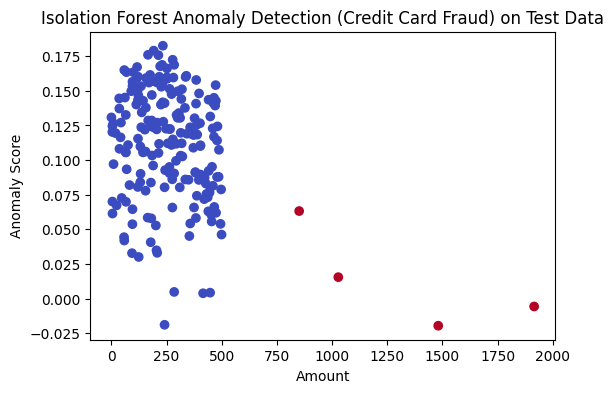

In [ ]:
# Plot the results for the test set
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Amount'], X_test['Anomaly Score'], c=y_test, cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Anomaly Score')
plt.title('Isolation Forest Anomaly Detection (Credit Card Fraud) on Test Data')
plt.show()

**Observation:**

1. **Anomaly Scores and Detection:**

  - The anomaly scores range from approximately -0.025 to 0.175.
The model detected 4 anomalies, with transaction amounts around 750, 1000, 1500, and 2000 (all the values are in $).

2. **Transaction Amount Distribution:**

  - Normal transactions are predominantly below $500, totaling 194 instances.
Higher transaction amounts are more likely to be flagged as anomalies, indicating effective detection of outliers.

## __6.6 Model Evaluation and Validation in Unsupervised Learning__

Model evaluation and validation in unsupervised learning are crucial steps to ensure that the model accurately captures the underlying structure of the data. Unlike supervised learning, where labeled data provides a clear metric for evaluation, unsupervised learning relies on different techniques and metrics.

### __6.6.1 Silhouette Score for Clustering__

**Silhouette Score:**
It measures the quality of clusters by comparing the average distance between points within a cluster to the average distance between points in different clusters. A score close to +1 indicates well-separated clusters, while a score close to -1 indicates overlapping clusters.

For example, if we have two clusters of customer data and the Silhouette Score is 0.7, it suggests that the customers are well-grouped with clear distinctions between the clusters. Conversely, a score of -0.3 would indicate that the clusters are poorly defined and overlapping.

**Note:** In the previous lesson, we have already covered the implementation of the Silhouette Score using the K-means algorithm.

##__Conclusion__##


In conclusion, unsupervised learning techniques are powerful tools for exploring and extracting meaningful insights from unlabeled data. By allowing algorithms to autonomously identify patterns and structures within datasets, you can uncover hidden relationships, detect anomalies, and gain a deeper understanding of the underlying data distribution. From clustering and dimensionality reduction to association rule learning, the applications of unsupervised learning are vast and diverse, spanning fields such as data analysis, pattern recognition, and anomaly detection.